In [36]:
import numpy as np
from tqdm import tqdm
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow.keras.backend as K
from tensorflow.keras.layers import Dense, Flatten, Conv2D, Reshape, Input, MaxPooling2D

In [7]:
image = np.load("images.npy")
label = np.load("labels.npy")
print(f"Image shape: {image.shape}")
print(f"Label shape: {label.shape}")

Image shape: (18000, 150, 150)
Label shape: (18000, 2)


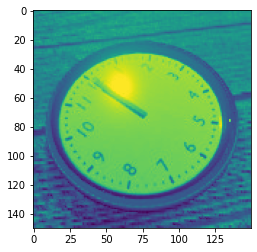

In [14]:
image = image.reshape(image.shape + (1,))
plt.imshow(image[0])
plt.show()

In [44]:
X, X_test, y, y_test = train_test_split(image, label, test_size=0.2, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Train set: {X_train.shape}")
print(f"Valid set: {X_valid.shape}")
print(f"Test set: {X_test.shape}")

Train set: (11520, 150, 150, 1)
Valid set: (2880, 150, 150, 1)
Test set: (3600, 150, 150, 1)


In [42]:
# Task: Regression
def regression_model():
    in_put = Input((150, 150, 1))
    x = Conv2D(32, (3, 3), activation="relu")(in_put)
    x = MaxPooling2D((2, 2))(x)
    x = Conv2D(16, (3, 3), activation="relu", strides=(2, 2))(x)
    x = MaxPooling2D((2, 2))(x)
    x = Conv2D(16, (3, 3), activation="relu")(x)
    x = MaxPooling2D((2, 2))(x)
    x = Flatten()(x)
    x = Dense(64, activation="relu")(x)
    x = Dense(1)(x)
    model = tf.keras.Model(in_put, x)
    model.summary()
    def common_sense_reg(y_true, y_pred):
        d = K.abs(y_true - y_pred)
        return (d // 6) * (d) + (d // 6) * (12 - d)
    model.compile(optimizer="adam", loss="mse", metrics=common_sense_reg)
    return model

def label_reg(y):
    trans = y[:, 0] + np.around(y[:, 1] / 60, 2)
    return trans

y_re_train = label_reg(y_train)
y_re_valid = label_reg(y_valid)
y_re_test = label_reg(y_test)

model = regression_model()
model.fit(x=X_train, y=y_re_train, batch_size=64, epochs=20, validation_data=(X_valid, y_re_valid))

Model: "model_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_12 (InputLayer)       [(None, 150, 150, 1)]     0         
                                                                 
 conv2d_31 (Conv2D)          (None, 148, 148, 32)      320       
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 74, 74, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_32 (Conv2D)          (None, 36, 36, 16)        4624      
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 18, 18, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_33 (Conv2D)          (None, 16, 16, 16)        2320

In [43]:
model.evaluate(X_test, y_re_test)

113/113 [==============================] - 1s 5ms/step - loss: 7.5820 - common_sense_reg: 0.4333


[7.58198356628418, 0.4333333373069763]

In [ ]:
# Task: Classification
def classification_model():
    in_put = Input((150, 150, 1))
    x = Conv2D(32, (3, 3), activation="relu")(in_put)
    x = MaxPooling2D((2, 2))(x)
    x = Conv2D(16, (3, 3), activation="relu", strides=(2, 2))(x)
    x = MaxPooling2D((2, 2))(x)
    x = Conv2D(16, (3, 3), activation="relu")(x)
    x = MaxPooling2D((2, 2))(x)
    x = Flatten()(x)
    x = Dense(64, activation="relu")(x)
    x = Dense(1)(x)
    model = tf.keras.Model(in_put, x)
    model.summary()
    def common_sense_reg(y_true, y_pred):
        d = K.abs(y_true - y_pred)
        return (d // 6) * (d) + (d // 6) * (12 - d)
    model.compile(optimizer="adam", loss="mse", metrics=common_sense_reg)
    return model